# **Machine learning for Data Engineers Project**
---
Kaci BOUAOULI - Abel BOUDAIB - Nadjib KHAMMAR - Hamza HORD - Ingé3 DE1


---







# Topic : Ecology - Predicting Algerian's Forest Fires

Voici une proposition d'introduction pour votre notebook de projet "Algerian Forest Fires Prediction" :

---

# Algerian Forest Fires Prediction - Data Analysis

Dans le cadre de notre projet sur la prédiction des risques d'incendies de forêt en Algérie, nous analysons un jeu de données détaillant les observations météorologiques quotidiennes et les indices associés aux incendies de forêt. Ce dataset est essentiel pour construire un modèle prédictif capable d'identifier les régions à haut risque d'incendies en fonction des conditions environnementales.

### **Description du Dataset**

Le dataset se compose de plusieurs colonnes, chacune fournissant des informations pertinentes sur les conditions météorologiques et les indices de risque d'incendie. Voici les colonnes du dataset :

- **Date** : La date de l'observation (format DD/MM/YYYY), avec les mois de juin à septembre de l'année 2012.
- **Temp** : La température maximale observée à midi (en degrés Celsius), variant de 22 à 42°C.
- **RH** : L'humidité relative de l'air (en %) entre 21 et 90%.
- **Ws** : La vitesse du vent (en km/h) allant de 6 à 29 km/h.
- **Rain** : La quantité de pluie totale de la journée (en mm), allant de 0 à 16.8 mm.

### **Indices du système FWI (Fire Weather Index)**

Les indices suivants sont utilisés pour évaluer le risque d'incendie de forêt :

- **FFMC (Fine Fuel Moisture Code)** : Un indice représentant l'humidité des combustibles fins, variant de 28.6 à 92.5.
- **DMC (Duff Moisture Code)** : Un indice indiquant l'humidité du sol et des combustibles plus gros, allant de 1.1 à 65.9.
- **DC (Drought Code)** : Un indice représentant l'humidité des couches profondes du sol, allant de 7 à 220.4.
- **ISI (Initial Spread Index)** : Un indice indiquant la vitesse de propagation initiale du feu, variant de 0 à 18.5.
- **BUI (Buildup Index)** : Un indice indiquant la quantité de carburant disponible pour l'ignition, allant de 1.1 à 68.
- **FWI (Fire Weather Index)** : L'indice principal évaluant le risque d'incendie, avec une plage de 0 à 31.1.

### **Classes**

Les observations sont classées en deux catégories :
- **Fire** : Indiquant qu'un incendie a eu lieu.
- **Not Fire** : Indiquant l'absence d'incendie.

L'objectif de ce projet est d'utiliser ces données pour prédire les zones à haut risque d'incendie et ainsi aider à la gestion préventive des incendies en Algérie.


1. Importation des bibliothèques

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

2. Importation du dataset

In [ ]:
df = pd.read_csv("/content/Algerian_forest_fires_dataset.csv", header=0)

df.columns = ['Day', 'Month', 'Year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

df.dropna(inplace=True)

df.drop(['Day','Month','Year'],axis=1,inplace=True)

print(df.columns)

df.columns = df.columns.str.strip()

df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

print(df['Classes'].value_counts())

df.head()

df['Classes'].value_counts()


Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes'],
      dtype='object')
Classes
1    138
0    106
Name: count, dtype: int64


,count
Classes,
1,138
0,106


2. Visualisation des données

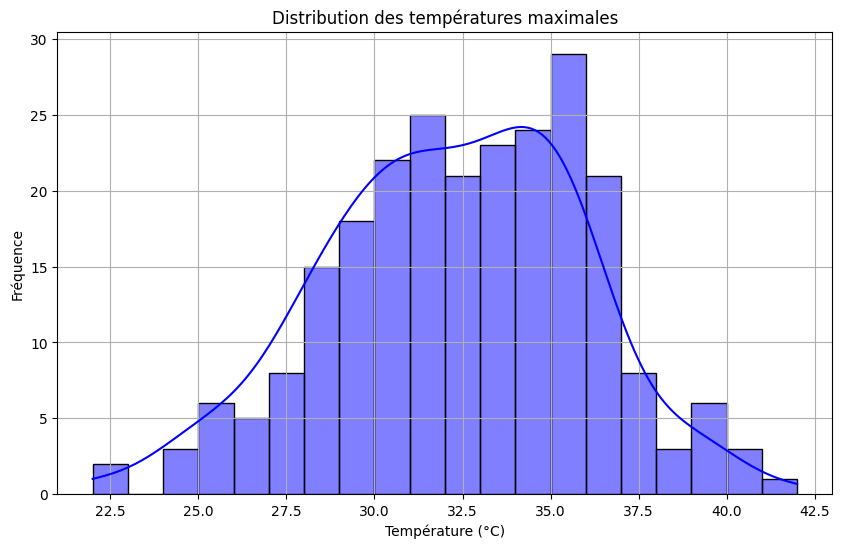

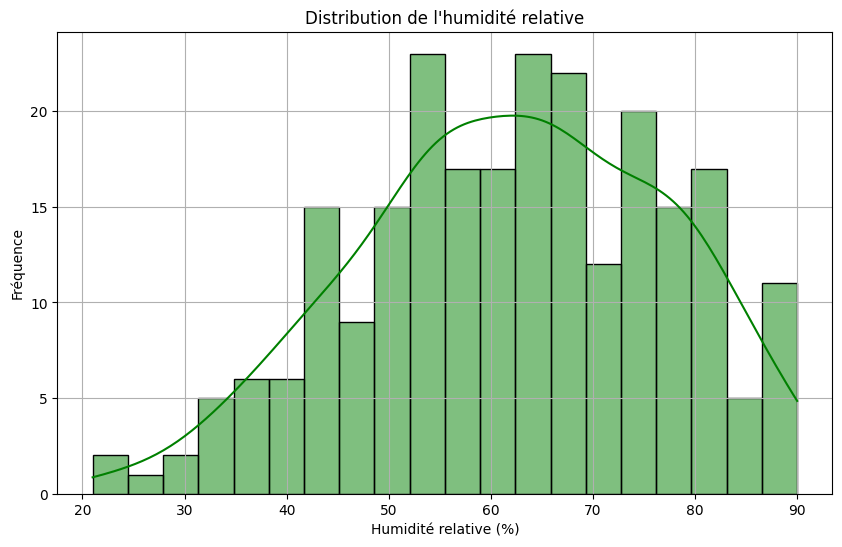

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
dtype: int64


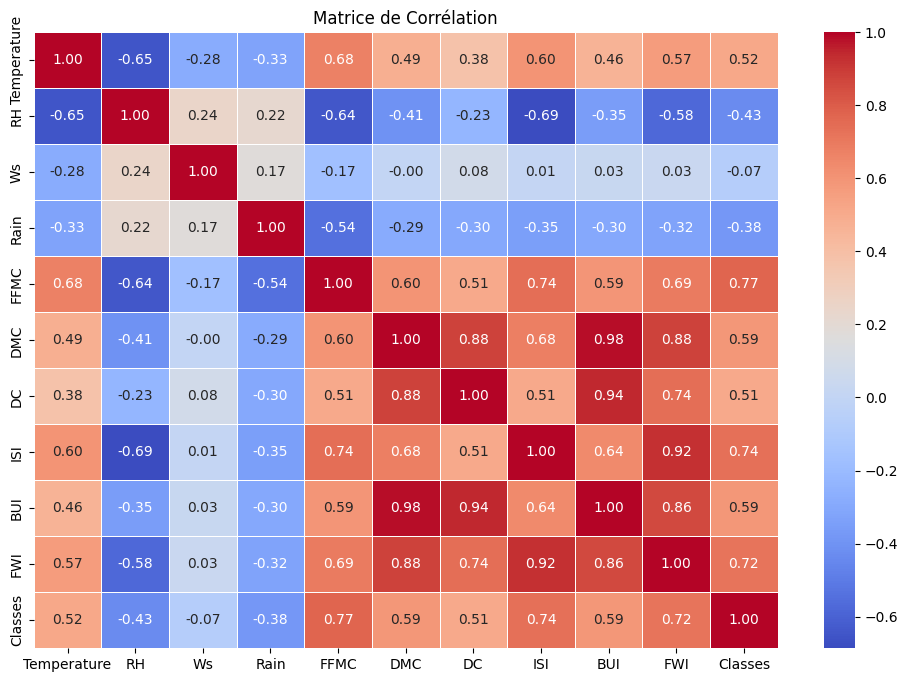

In [ ]:
# 1. Distribution des températures
plt.figure(figsize=(10, 6))
sns.histplot(df['Temperature'], kde=True, color='blue', bins=20)
plt.title('Distribution des températures maximales')
plt.xlabel('Température (°C)')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

# 2. Distribution de l'humidité relative
plt.figure(figsize=(10, 6))
sns.histplot(df['RH'], kde=True, color='green', bins=20)
plt.title('Distribution de l\'humidité relative')
plt.xlabel('Humidité relative (%)')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

columns_to_convert = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

df.dropna(subset=columns_to_convert, inplace=True)

# 3. Matrice de corrélation entre les variables numériques
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()





---

# **Classification :**

1. Préparation des données pour la classification

In [ ]:
X = df.drop('Classes', axis=1)
y = df['Classes']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

2. Classification avec un modèle Random Forest

Accuracy :  0.9863013698630136

Classification Report : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.98      0.99        44

    accuracy                           0.99        73
   macro avg       0.98      0.99      0.99        73
weighted avg       0.99      0.99      0.99        73


Matrice de confusion : 
 [[29  0]
 [ 1 43]]

F1-Score :  0.9885057471264368


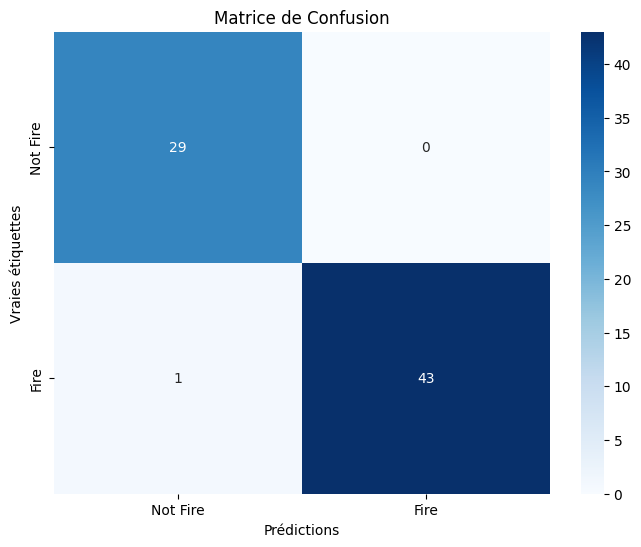

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy : ", accuracy)
print("\nClassification Report : \n", classification_report(y_test, y_pred))
print("\nMatrice de confusion : \n", confusion_matrix(y_test, y_pred))
print("\nF1-Score : ", f1)

# 1. Affichage de la Matrice de Confusion
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fire', 'Fire'], yticklabels=['Not Fire', 'Fire'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()



---

# **Deep Learning :**

1. Importer les bibliothèques nécessaires

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score


2. Charger et préparer les données

In [ ]:
df = pd.read_csv("/content/Algerian_forest_fires_dataset.csv", header=0)

df.columns = ['Day', 'Month', 'Year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

df.drop(['Day', 'Month', 'Year'], axis=1, inplace=True)

df['Classes'] = np.where(df['Classes'].str.contains("not fire"), 0, 1)

print(df['Classes'].value_counts())

columns_to_convert = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

df.dropna(subset=columns_to_convert, inplace=True)

df.dropna(inplace=True)

Classes
1    138
0    109
Name: count, dtype: int64


3. Séparer les caractéristiques (X) et la cible (y)

In [ ]:
X = df.drop('Classes', axis=1)
y = df['Classes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

4. Créer le modèle de Deep Learning avec Keras

In [ ]:
model = Sequential()

model.add(Dense(10, input_dim=X_train_scaled.shape[1], activation='relu'))

for _ in range(10):
    model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5. Entraîner le modèle

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.5039 - loss: 0.6929 - val_accuracy: 0.8082 - val_loss: 0.6886
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7923 - loss: 0.6877 - val_accuracy: 0.8767 - val_loss: 0.6812
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8538 - loss: 0.6809 - val_accuracy: 0.8767 - val_loss: 0.6701
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8358 - loss: 0.6677 - val_accuracy: 0.8767 - val_loss: 0.6530
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8433 - loss: 0.6476 - val_accuracy: 0.8767 - val_loss: 0.6280
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8317 - loss: 0.6192 - val_accuracy: 0.8493 - val_loss: 0.5925
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8631 - loss: 0.5715 - val_accuracy: 0.8219 - val_loss: 0.5464
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8620 - loss: 0.5207 - val_accuracy: 0.8904 - val_loss: 0.4934
E

6. Évaluation du modèle

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)

y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype("int32")

print("Accuracy : ", accuracy)
print("\nClassification Report : \n", classification_report(y_test, y_pred))
print("\nMatrice de confusion : \n", confusion_matrix(y_test, y_pred))

f1 = f1_score(y_test, y_pred)
print("\nF1-Score : ", f1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9228 - loss: 0.1374 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Accuracy :  0.931506872177124

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.90      0.91        29
           1       0.93      0.95      0.94        44

    accuracy                           0.93        73
   macro avg       0.93      0.93      0.93        73
weighted avg       0.93      0.93      0.93        73


Matrice de confusion : 
 [[26  3]
 [ 2 42]]

F1-Score :  0.9438202247191011


7. Visualisations
    * a) Courbe d'apprentissage (précision et perte au fil des époques)

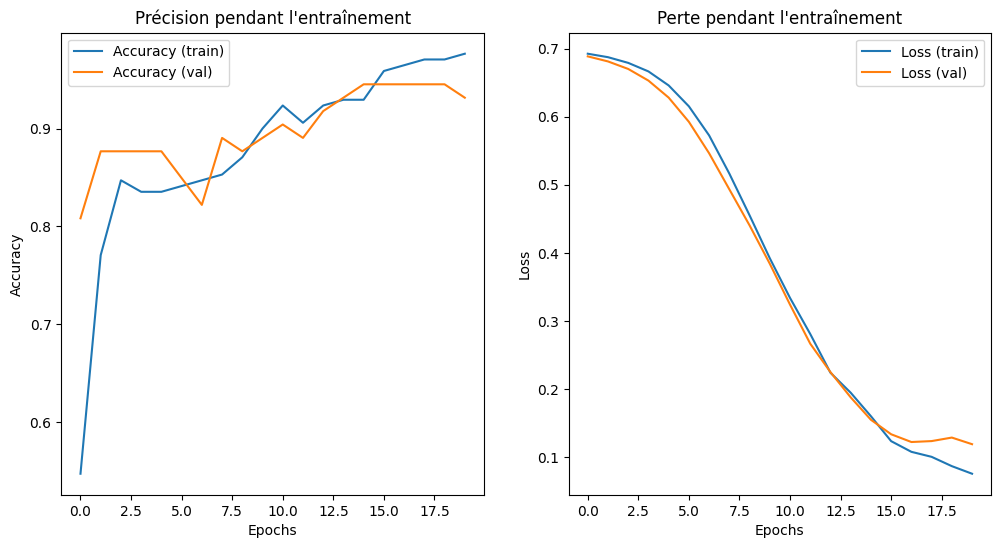

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy (train)')
plt.plot(history.history['val_accuracy'], label='Accuracy (val)')
plt.title('Précision pendant l\'entraînement')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss (train)')
plt.plot(history.history['val_loss'], label='Loss (val)')
plt.title('Perte pendant l\'entraînement')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

  b) Matrice de confusion

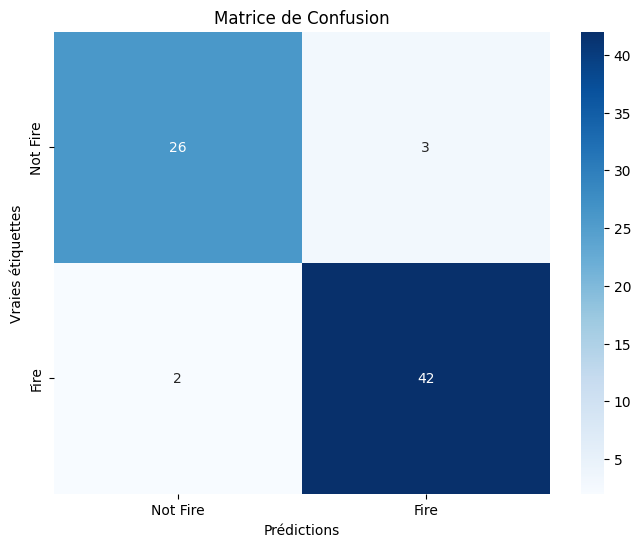

In [ ]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fire', 'Fire'], yticklabels=['Not Fire', 'Fire'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

c) Matrice de corrélation (avec données de test)

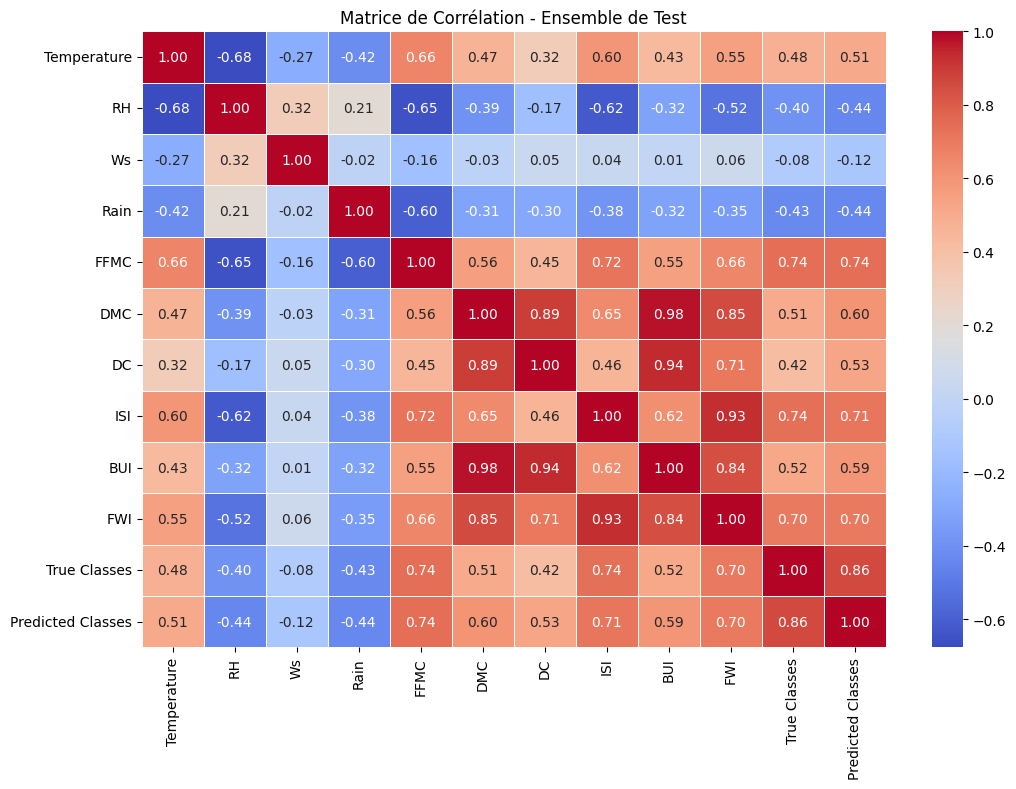

In [ ]:
test_df = X_test.copy()
test_df['True Classes'] = y_test
test_df['Predicted Classes'] = y_pred.flatten()

correlation_matrix = test_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation - Ensemble de Test')
plt.show()

In [ ]:
from tensorflow.keras.models import save_model

model.save("forest_fire_model_dl.h5")

print("Le modèle Deep Learning a été sauvegardé sous 'forest_fire_model_dl.h5'.")

Le modèle Deep Learning a été sauvegardé sous 'forest_fire_model_dl.h5'.


In [ ]:
import joblib

joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']